# Example Vessel Analysis Jupyter Notebook

This is an example of a Jupyter Notebook using the Vessel Analysis Package. The notebook shows how data can be loaded from a csv file and analyzed using pre-made functions to generate useful visualizations. This notebook is interactive: you may run any cell by clicking in the sell and then pressing shift-enter. The notebook is also read-only, so you can experiment liberally and none of your changes will be saved.

## Imports
The code cell below imports necessary packages modules.

In [1]:
import os
os.chdir('..')
import VesselAnalysisPkg as VA
import matplotlib as plt

## Loading data
The Vessel Analysis package is designed to aid in analyzing vessel data, but since vessel owners own their data, I'll look at some weather data for Juneau, AK. I've downloaded one year's data from noaa.gov, and saved it in a comma-separated-variables (CSV) file. I want to make a histogram of daily median temperature versus time.

The first step is to load data from the file. I can do that by creating a realization of the CSV_General class declared in the csv_data_processing module. The class takes a filepath as an input parameter. I can also specify the number of header rows before the first data record (2 in this case), and the columns that I want to load. The number of header rows is an optional argument, so it must be specified using the following format: *input value name*:value. Temperature lows are stored in column 2 (counting from 0 for the first column), so I'll pass that index to the class declaration as well. The column load index must be passed to the class as a dict of key word arguments. The key (or keys if more than one column is loaded) will become the name of the attribute where the data is stored.

In [29]:
# Define specifications for data load:
filepath = 'VesselAnalysisPkg/Examples/JuneauWeatherData.csv'
nheaders = 2
datacolumns = {'daily_low':9, 'daily_high':8}

# Load the data:
jnuweather = VA.csv_data_processing.CSV_General(filepath, 
                                               n_headerlines=nheaders,
                                               **datacolumns)
medtemp = (jnuweather.daily_low + jnuweather.daily_high)/2
# missing data were recorded as -9999, so I'll filter those out:
medtemp = medtemp[medtemp!=-9999]

## Plotting data
The standard matplotlib package has a histogram function, but the labels tend to be too small, and the bin counts are absolute rather than relative. The Vessel Analysis Package includes functions to automatically adjust the font labels and bin counts, so I'll use that here.

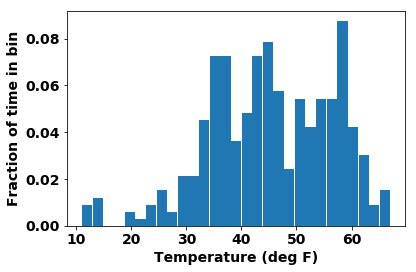

In [30]:
# Instruct the notebook to display the plot
%matplotlib inline
# Create the plot and store the counts, bin edges
# and plot handle in cnts, bins and hndl, respectively.
cnts, bins, hndl = VA.plotting_functions.hist_plot(medtemp,
                                                   xlabel="Temperature (deg F)")

## Conclusion
Deploying the Vessel Analysis Package in a Jupyter Notebook provides an simple means for sharing analyses of vessel data. The notebooks can be accessed and used interactivel from anywhere with internet access without any program installation required. The examples shown here demonstrate how to call basic functions within the package. The Vessel Analysis Package also includes functions to automatically load data from a variety of recording devices used during sea trials and long term recording sessions; tools to extract the rpm, power, speed and fuel consumption relationships measured during sea trials; and methods for storing and visualzing data associated with a vessel.